## Let's firstly import the required libraries

In [1]:
import pandas as pd

import numpy as np

from matplotlib import pyplot as plt

### Lets now load the csv file of Nashville data that we have 

In [2]:
# we will be load the data in form of data frame with help of pandas

nashville_data = pd.read_csv(r'C:\Users\aneee\Downloads\Nashville Data.csv')
nashville_data

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE","April 9, 2013",240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE","June 10, 2014",366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE","September 26, 2016",435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE","January 29, 2016",255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE","October 10, 2014",278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE","May 27, 2015",157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE","March 2, 2015",145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE","August 16, 2016",234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE","September 7, 2016",93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### SO we loaded out the required dataset in the form of pandas data frame

In [3]:
nashville_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 56477 entries, 0 to 56476
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   UniqueID         56477 non-null  int64  
 1   ParcelID         56477 non-null  object 
 2   LandUse          56477 non-null  object 
 3   PropertyAddress  56448 non-null  object 
 4   SaleDate         56477 non-null  object 
 5   SalePrice        56477 non-null  object 
 6   LegalReference   56477 non-null  object 
 7   SoldAsVacant     56477 non-null  object 
 8   OwnerName        25261 non-null  object 
 9   OwnerAddress     26015 non-null  object 
 10  Acreage          26015 non-null  float64
 11  TaxDistrict      26015 non-null  object 
 12  LandValue        26015 non-null  float64
 13  BuildingValue    26015 non-null  float64
 14  TotalValue       26015 non-null  float64
 15  YearBuilt        24163 non-null  float64
 16  Bedrooms         24157 non-null  float64
 17  FullBath    

### Transforming the SaleDate type to actual date format

In [4]:
 nashville_data['SaleDate'] = pd.to_datetime(nashville_data['SaleDate'])

In [5]:
nashville_data['SaleDate']

0       2013-04-09
1       2014-06-10
2       2016-09-26
3       2016-01-29
4       2014-10-10
           ...    
56472   2015-05-27
56473   2015-03-02
56474   2016-08-16
56475   2016-09-07
56476   2016-09-07
Name: SaleDate, Length: 56477, dtype: datetime64[ns]

### Filling up the null value of Property address according to the Parcel ID

In [6]:
# we have the null property address although with the same parcel id one is null and another filled
# so we will be filling up the nulls in property address

nashville_data = nashville_data.sort_values(by = 'ParcelID', ascending = True)

In [7]:
nashville_data

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,20150608-0053286,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,20150304-0019013,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
# so we sorted out the data according to parcel id so that we can fill the nulls with the previous value in propert address

nashville_data['PropertyAddress']= nashville_data['PropertyAddress'].fillna(method = 'ffill')

In [9]:
# lets look if there are anyv nulls left or not

nashville_data['PropertyAddress'].isna().sum().sum()

0

### now lets split the property address in address of property and city of property

In [10]:
nashville_data[['address_of_property','city_of_property']] = nashville_data['PropertyAddress'].str.split(',', expand = True)
nashville_data

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,TaxDistrict,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address_of_property,city_of_property
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,168200.0,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,264100.0,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,216200.0,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,147300.0,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",...,GENERAL SERVICES DISTRICT,50000.0,152300.0,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,20150608-0053286,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1435 WINDING CREEK DR,NOLENSVILLE
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,20150304-0019013,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1423 WINDING CREEK DR,NOLENSVILLE
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1804 GRACE POINT LN,NOLENSVILLE
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1709 PARK TERRACE LN,NOLENSVILLE


### now lets split the owner address into address of owner , city of owner , state of owner


In [11]:
nashville_data["OwnerAddress"]
nashville_data[['address_of_owner','city_of_owner','state_of_owner']] = nashville_data['OwnerAddress'].str.split(',', expand = True)

In [12]:
nashville_data

,UniqueID,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,...,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address_of_property,city_of_property,address_of_owner,city_of_owner,state_of_owner
0,2045,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",...,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,16918,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",...,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,54582,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",...,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,43070,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",...,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,22714,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",...,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,30469,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,20150608-0053286,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1435 WINDING CREEK DR,NOLENSVILLE,NaN,NaN,NaN
56473,27707,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,20150304-0019013,No,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1423 WINDING CREEK DR,NOLENSVILLE,NaN,NaN,NaN
56474,52709,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1804 GRACE POINT LN,NOLENSVILLE,NaN,NaN,NaN
56475,54042,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1709 PARK TERRACE LN,NOLENSVILLE,NaN,NaN,NaN


### Lets check out for the duplicate value

In [13]:
# we must be deleting the column unique id because it is not going to help of get the actual duplicates in our data

nashville_data.drop(['UniqueID '], axis=1, inplace = True)

In [14]:
nashville_data.duplicated().groupby(nashville_data.duplicated()).count()

False    56374
True       103
dtype: int64

In [15]:
# so there are found to be 103 duplicates in our data so lets delete those duplicates

nashville_data.drop_duplicates()

,ParcelID,LandUse,PropertyAddress,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,OwnerAddress,Acreage,...,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,address_of_property,city_of_property,address_of_owner,city_of_owner,state_of_owner
0,007 00 0 125.00,SINGLE FAMILY,"1808 FOX CHASE DR, GOODLETTSVILLE",2013-04-09,240000,20130412-0036474,No,"FRAZIER, CYRENTHA LYNETTE","1808 FOX CHASE DR, GOODLETTSVILLE, TN",2.3,...,235700.0,1986.0,3.0,3.0,0.0,1808 FOX CHASE DR,GOODLETTSVILLE,1808 FOX CHASE DR,GOODLETTSVILLE,TN
1,007 00 0 130.00,SINGLE FAMILY,"1832 FOX CHASE DR, GOODLETTSVILLE",2014-06-10,366000,20140619-0053768,No,"BONER, CHARLES & LESLIE","1832 FOX CHASE DR, GOODLETTSVILLE, TN",3.5,...,319000.0,1998.0,3.0,3.0,2.0,1832 FOX CHASE DR,GOODLETTSVILLE,1832 FOX CHASE DR,GOODLETTSVILLE,TN
2,007 00 0 138.00,SINGLE FAMILY,"1864 FOX CHASE DR, GOODLETTSVILLE",2016-09-26,435000,20160927-0101718,No,"WILSON, JAMES E. & JOANNE","1864 FOX CHASE DR, GOODLETTSVILLE, TN",2.9,...,298000.0,1987.0,4.0,3.0,0.0,1864 FOX CHASE DR,GOODLETTSVILLE,1864 FOX CHASE DR,GOODLETTSVILLE,TN
3,007 00 0 143.00,SINGLE FAMILY,"1853 FOX CHASE DR, GOODLETTSVILLE",2016-01-29,255000,20160129-0008913,No,"BAKER, JAY K. & SUSAN E.","1853 FOX CHASE DR, GOODLETTSVILLE, TN",2.6,...,197300.0,1985.0,3.0,3.0,0.0,1853 FOX CHASE DR,GOODLETTSVILLE,1853 FOX CHASE DR,GOODLETTSVILLE,TN
4,007 00 0 149.00,SINGLE FAMILY,"1829 FOX CHASE DR, GOODLETTSVILLE",2014-10-10,278000,20141015-0095255,No,"POST, CHRISTOPHER M. & SAMANTHA C.","1829 FOX CHASE DR, GOODLETTSVILLE, TN",2.0,...,202300.0,1984.0,4.0,3.0,0.0,1829 FOX CHASE DR,GOODLETTSVILLE,1829 FOX CHASE DR,GOODLETTSVILLE,TN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56472,188 10 0A 101.00,SINGLE FAMILY,"1435 WINDING CREEK DR, NOLENSVILLE",2015-05-27,157500,20150608-0053286,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1435 WINDING CREEK DR,NOLENSVILLE,NaN,NaN,NaN
56473,188 10 0A 107.00,SINGLE FAMILY,"1423 WINDING CREEK DR, NOLENSVILLE",2015-03-02,145000,20150304-0019013,No,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1423 WINDING CREEK DR,NOLENSVILLE,NaN,NaN,NaN
56474,188 10 0A 118.00,VACANT RESIDENTIAL LAND,"1804 GRACE POINT LN, NOLENSVILLE",2016-08-16,234611,20160819-0087214,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1804 GRACE POINT LN,NOLENSVILLE,NaN,NaN,NaN
56475,188 10 0A 121.00,VACANT RESIDENTIAL LAND,"1709 PARK TERRACE LN, NOLENSVILLE",2016-09-07,93844,20160919-0098411,Yes,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,1709 PARK TERRACE LN,NOLENSVILLE,NaN,NaN,NaN


### Delete the unwanted columns 

In [16]:
nashville_data.drop(columns= ['PropertyAddress','OwnerAddress','TaxDistrict'], inplace = True)

In [17]:
nashville_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56477 entries, 0 to 56476
Data columns (total 20 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ParcelID             56477 non-null  object        
 1   LandUse              56477 non-null  object        
 2   SaleDate             56477 non-null  datetime64[ns]
 3   SalePrice            56477 non-null  object        
 4   LegalReference       56477 non-null  object        
 5   SoldAsVacant         56477 non-null  object        
 6   OwnerName            25261 non-null  object        
 7   Acreage              26015 non-null  float64       
 8   LandValue            26015 non-null  float64       
 9   BuildingValue        26015 non-null  float64       
 10  TotalValue           26015 non-null  float64       
 11  YearBuilt            24163 non-null  float64       
 12  Bedrooms             24157 non-null  float64       
 13  FullBath             24275 non-

### Adding the profit amount column

In [18]:
# convert the Sale Price to float for calculation of profit
# nashville_data['SalePrice']= nashville_data['SalePrice'].astype(float)

nashville_data['SalePrice'] = pd.to_numeric(nashville_data['SalePrice'],errors='coerce')


nashville_data['Profit_amount']= nashville_data['SalePrice']-nashville_data['TotalValue']

In [19]:
nashville_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 56477 entries, 0 to 56476
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   ParcelID             56477 non-null  object        
 1   LandUse              56477 non-null  object        
 2   SaleDate             56477 non-null  datetime64[ns]
 3   SalePrice            56465 non-null  float64       
 4   LegalReference       56477 non-null  object        
 5   SoldAsVacant         56477 non-null  object        
 6   OwnerName            25261 non-null  object        
 7   Acreage              26015 non-null  float64       
 8   LandValue            26015 non-null  float64       
 9   BuildingValue        26015 non-null  float64       
 10  TotalValue           26015 non-null  float64       
 11  YearBuilt            24163 non-null  float64       
 12  Bedrooms             24157 non-null  float64       
 13  FullBath             24275 non-

### EXploratory data analysis

In [20]:
nashville_data.describe()

,SalePrice,Acreage,LandValue,BuildingValue,TotalValue,YearBuilt,Bedrooms,FullBath,HalfBath,Profit_amount
count,5.646500e+04,26015.000000,2.601500e+04,2.601500e+04,2.601500e+04,24163.000000,24157.000000,24275.000000,24144.000000,2.600900e+04
mean,3.272469e+05,0.498923,6.906856e+04,1.607847e+05,2.323754e+05,1963.744899,3.089912,1.886014,0.283921,4.835472e+04
std,9.299213e+05,1.570454,1.060401e+05,2.067999e+05,2.810643e+05,26.542982,0.852869,0.961515,0.487881,2.828503e+05
min,5.000000e+01,0.010000,1.000000e+02,0.000000e+00,1.000000e+02,1799.000000,0.000000,0.000000,0.000000,-5.497600e+06
25%,1.350000e+05,0.180000,2.100000e+04,7.590000e+04,1.028000e+05,1948.000000,3.000000,1.000000,0.000000,1.000000e+02
50%,2.053500e+05,0.270000,2.880000e+04,1.114000e+05,1.485000e+05,1960.000000,3.000000,2.000000,0.000000,3.000000e+04
75%,3.287000e+05,0.450000,6.000000e+04,1.807000e+05,2.683500e+05,1983.000000,3.000000,2.000000,1.000000,7.720000e+04
max,5.427806e+07,160.060000,2.772000e+06,1.297180e+07,1.394040e+07,2017.000000,11.000000,10.000000,3.000000,1.230000e+07


In [21]:
# Average Total value according to the different city

nashville_data[['city_of_property','TotalValue']].groupby(nashville_data['city_of_property']).mean().round(3)

,TotalValue
city_of_property,
ANTIOCH,111825.661
BELLEVUE,12400.000
BRENTWOOD,434475.980
FRANKLIN,NaN
GOODLETTSVILLE,147648.195
HERMITAGE,131214.442
JOELTON,136618.182
MADISON,118744.791
MOUNT JULIET,213200.000


In [22]:
# Total Profit generated on housing according to cities

nashville_data['Profit_amount'].groupby(nashville_data['city_of_property']).sum().astype(int)

city_of_property
 ANTIOCH             30989820
 BELLEVUE               12600
 BRENTWOOD            9623924
 FRANKLIN                   0
 GOODLETTSVILLE       6898191
 HERMITAGE           27450569
 JOELTON                72831
 MADISON             21368918
 MOUNT JULIET          330200
 NASHVILLE         1145007482
 NOLENSVILLE          1314090
 OLD HICKORY         13654081
 UNKNOWN                    0
 WHITES CREEK          935100
Name: Profit_amount, dtype: int32

In [23]:
# how many single family  land use property were sold

nashville_data['LandUse'].loc[nashville_data['LandUse'] == 'SINGLE FAMILY'].count()

34197

In [24]:
# Top 5 highest Property along with Sale Value

nashville_data.sort_values(by = 'SalePrice', ascending = False).head(5)

,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,address_of_property,city_of_property,address_of_owner,city_of_owner,state_of_owner,Profit_amount
21573,093 13 0B 108.00,RESIDENTIAL CONDO,2014-12-17,54278060.0,20141217-0115478,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,320 11TH AVE S,NASHVILLE,NaN,NaN,NaN,NaN
21600,093 13 0B 447.00,RESIDENTIAL CONDO,2014-12-17,54278060.0,20141217-0115478,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,320 11TH AVE S,NASHVILLE,NaN,NaN,NaN,NaN
21578,093 13 0B 134.00,RESIDENTIAL CONDO,2014-12-17,54278060.0,20141217-0115478,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,320 11TH AVE S,NASHVILLE,NaN,NaN,NaN,NaN
21593,093 13 0B 337.00,RESIDENTIAL CONDO,2014-12-17,54278060.0,20141217-0115478,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,320 11TH AVE S,NASHVILLE,NaN,NaN,NaN,NaN
21590,093 13 0B 322.00,RESIDENTIAL CONDO,2014-12-17,54278060.0,20141217-0115478,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,320 11TH AVE S,NASHVILLE,NaN,NaN,NaN,NaN


In [25]:
# Top 5 bad profitable property details 

nashville_data.sort_values(by = 'Profit_amount', ascending = True).head(5)

,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,address_of_property,city_of_property,address_of_owner,city_of_owner,state_of_owner,Profit_amount
38089,132 06 0 036.00,SINGLE FAMILY,2013-11-15,905000.0,20131121-0120098,No,"DENMARK, JENNIFER AND MATTHEW REVOCABLE TRUST",4.00,520000.0,5824300.0,...,2016.0,5.0,5.0,2.0,4225 FRANKLIN PIKE,NASHVILLE,4225 FRANKLIN PIKE,NASHVILLE,TN,-5497600.0
38088,132 06 0 036.00,SINGLE FAMILY,2014-11-17,1100000.0,20141118-0106332,No,"DENMARK, JENNIFER AND MATTHEW REVOCABLE TRUST",4.00,520000.0,5824300.0,...,2016.0,5.0,5.0,2.0,4225 FRANKLIN PIKE,NASHVILLE,4225 FRANKLIN PIKE,NASHVILLE,TN,-5302600.0
42319,144 13 0 013.00,VACANT RES LAND,2013-03-12,1800000.0,20130314-0025450,No,"ANDREWS, WILLIAM J. CHRISTOPHER, TRUSTEE",4.27,777100.0,3563100.0,...,2015.0,7.0,7.0,1.0,4321 CHICKERING LN,NASHVILLE,4321 CHICKERING LN,NASHVILLE,TN,-2655200.0
37938,131 16 0 054.00,SINGLE FAMILY,2015-06-05,650000.0,20150608-0053395,No,"HAYLES, RAYMOND SISLER III & KARA M.",1.34,271400.0,2134400.0,...,2016.0,5.0,5.0,3.0,1011 GRASSLAND LN,NASHVILLE,1011 GRASSLAND LN,NASHVILLE,TN,-1755800.0
42534,146 01 0 001.00,SINGLE FAMILY,2014-09-30,850000.0,20141001-0090455,No,"TAYLOR, JOHN CHRISTOPHER & ELIZABETH H.",4.52,638800.0,1863800.0,...,2016.0,5.0,5.0,2.0,956 TYNE BLVD,NASHVILLE,956 TYNE BLVD,NASHVILLE,TN,-1656000.0


In [26]:
# Provide the list of property  that had a profit amount more than 200000 

nashville_data.loc[nashville_data['Profit_amount']>200000].sort_values(by = 'Profit_amount',ascending = True)

,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,address_of_property,city_of_property,address_of_owner,city_of_owner,state_of_owner,Profit_amount
31595,117 01 0 074.00,SINGLE FAMILY,2016-07-01,889500.0,20160707-0069443,No,"PANKOW, GERALD R. & JENNY",0.39,240000.0,414500.0,...,1928.0,3.0,4.0,0.0,711 LYNNBROOK RD,NASHVILLE,711 LYNNBROOK RD,NASHVILLE,TN,200200.0
19870,092 03 0 353.00,TRIPLEX,2016-04-08,325000.0,20160412-0034942,No,SMS REAL ESTATE PARTNERS,0.20,12000.0,112500.0,...,1972.0,6.0,3.0,0.0,1900 HERMOSA ST,NASHVILLE,1900 HERMOSA ST,NASHVILLE,TN,200500.0
20645,093 04 0 107.00,SINGLE FAMILY,2016-10-31,475000.0,20161102-0115971,No,"MANN, SANDRA K.",0.17,25000.0,249300.0,...,2015.0,3.0,2.0,1.0,1009 GLENVIEW DR,NASHVILLE,1009 GLENVIEW DR,NASHVILLE,TN,200700.0
27487,105 01 0 158.00,SINGLE FAMILY,2015-07-01,700000.0,20150706-0065267,No,"WILLOUGHBY, BONNIE HORTON & JESSE TAYLOR",0.15,60000.0,430300.0,...,1923.0,5.0,2.0,1.0,1003 15TH AVE S,NASHVILLE,1003 15TH AVE S,NASHVILLE,TN,200700.0
24754,103 04 0 103.00,SINGLE FAMILY,2016-05-24,533000.0,20160607-0057403,No,"WILSON, STEPHEN & CALVERLEY, LAURA",0.15,150000.0,178100.0,...,1933.0,5.0,3.0,0.0,4501 WYOMING AVE,NASHVILLE,4501 WYOMING AVE,NASHVILLE,TN,200900.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38370,133 02 0 036.00,VACANT COMMERCIAL LAND,2014-08-08,9500000.0,20140811-0072057,No,"RADNOR II, L.P.",0.18,26000.0,0.0,...,NaN,NaN,NaN,NaN,311 SUNRISE AVE,NASHVILLE,311 SUNRISE AVE,NASHVILLE,TN,9474000.0
38371,133 02 0 037.00,VACANT COMMERCIAL LAND,2014-08-08,9500000.0,20140811-0072057,No,"RADNOR II, L.P.",0.18,26000.0,0.0,...,NaN,NaN,NaN,NaN,315 SUNRISE AVE,NASHVILLE,315 SUNRISE AVE,NASHVILLE,TN,9474000.0
38372,133 02 0 038.00,VACANT COMMERCIAL LAND,2014-08-08,9500000.0,20140811-0072057,No,"RADNOR II, L.P.",0.03,300.0,0.0,...,NaN,NaN,NaN,NaN,317 SUNRISE AVE,NASHVILLE,317 SUNRISE AVE,NASHVILLE,TN,9499700.0
32142,117 07 0 137.00,SINGLE FAMILY,2013-06-28,10750000.0,20130701-0067385,No,"HEAD, WILLIAM MICHAEL & BARR, STEPHENIE JANESE",0.46,220000.0,650000.0,...,1953.0,4.0,3.0,1.0,3428 STOKESMONT RD,NASHVILLE,3428 STOKESMONT RD,NASHVILLE,TN,9838200.0


In [27]:
# so we have got y and n for yes and no respectively in soldas vacant column so lets transform it

nashville_data['SoldAsVacant'] = nashville_data['SoldAsVacant'].replace({'Y':'Yes','N':'No'})

In [28]:
# How many properties were and were not sold as vacant. Count in numbers

nashville_data['SoldAsVacant'].groupby(nashville_data['SoldAsVacant']).count()


SoldAsVacant
No     51802
Yes     4675
Name: SoldAsVacant, dtype: int64

In [29]:
# SHow the state of owners and count the number of property sold

nashville_data['state_of_owner'].groupby(nashville_data['state_of_owner']).count()

state_of_owner
 TN    26015
Name: state_of_owner, dtype: int64

In [30]:
# Display the value of the total sale of the NAshville as Property city where the year built is later than 1999
# nashville_data.info()
nashville_data['TotalValue'].loc[(nashville_data['city_of_property']==' NASHVILLE') & (nashville_data['YearBuilt'] > 1999)].groupby(nashville_data['YearBuilt']).sum()

YearBuilt
2000.0     22288800.0
2001.0      8465400.0
2002.0     13129700.0
2003.0     14782900.0
2004.0     37511200.0
2005.0     43209900.0
2006.0     43120300.0
2007.0     52690500.0
2008.0     32732400.0
2009.0     27857100.0
2010.0     16200800.0
2011.0     18220700.0
2012.0     33365700.0
2013.0    124552700.0
2014.0    217190700.0
2015.0    343430800.0
2016.0    298923500.0
2017.0     10704700.0
Name: TotalValue, dtype: float64

In [31]:
# Sales details with the date as 2015-07-27

nashville_data.loc[nashville_data['SaleDate']== '2015-07-27']

,ParcelID,LandUse,SaleDate,SalePrice,LegalReference,SoldAsVacant,OwnerName,Acreage,LandValue,BuildingValue,...,YearBuilt,Bedrooms,FullBath,HalfBath,address_of_property,city_of_property,address_of_owner,city_of_owner,state_of_owner,Profit_amount
557,033 08 0 052.00,SINGLE FAMILY,2015-07-27,139900.0,20150803-0076425,No,"LUNSFORD, ADREA",0.28,22000.0,74900.0,...,1960.0,3.0,1.0,0.0,410 GATES RD,GOODLETTSVILLE,410 GATES RD,GOODLETTSVILLE,TN,43000.0
938,034 05 0A 054.00,RESIDENTIAL CONDO,2015-07-27,90000.0,20150731-0075598,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,550 THOMAS JEFFERSON CIR,MADISON,NaN,NaN,NaN,NaN
1828,043 05 0 163.00,SINGLE FAMILY,2015-07-27,112000.0,20150730-0075254,No,"ELIZER, THOMAS & LIBBY",0.15,18000.0,84700.0,...,1935.0,3.0,1.0,0.0,209 GARNER AVE,MADISON,209 GARNER AVE,MADISON,TN,9300.0
3326,051 14 0 062.00,SINGLE FAMILY,2015-07-27,200700.0,20150731-0075555,No,"CREECH, HANNAH",0.64,30000.0,105600.0,...,1954.0,3.0,2.0,0.0,836 LEMONT DR,NASHVILLE,836 LEMONT DR,NASHVILLE,TN,65100.0
3373,051 15 0C 021.00,SINGLE FAMILY,2015-07-27,183900.0,20150727-0073660,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,1520 BEAUS WAY,MADISON,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
54211,180 00 0 085.00,SINGLE FAMILY,2015-07-27,339528.0,20150804-0077423,No,"MISRA, SANJEEV & YABKO, STACEY",3.00,111000.0,141700.0,...,1978.0,3.0,2.0,0.0,6608 HOLT RD,NASHVILLE,6608 HOLT RD,NASHVILLE,TN,86828.0
54528,181 01 0B 228.00,SINGLE FAMILY,2015-07-27,265000.0,20150729-0074340,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,6508 SUNNYWOOD DR,NASHVILLE,NaN,NaN,NaN,NaN
54678,181 02 0A 108.00,RESIDENTIAL CONDO,2015-07-27,135000.0,20150825-0086073,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8421 CALLABEE WAY,ANTIOCH,NaN,NaN,NaN,NaN
55455,181 11 0C 013.00,RESIDENTIAL CONDO,2015-07-27,189500.0,20150804-0076918,No,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,8344 ROSSI RD,BRENTWOOD,NaN,NaN,NaN,NaN


In [32]:
# What were the average bedroomn , fullBAth room and halfbathrrom with the year built over 2000

nashville_data[['Bedrooms', 'FullBath', 'HalfBath']].loc[nashville_data['YearBuilt'] > 2000].groupby(nashville_data['YearBuilt']).mean().round(0)

,Bedrooms,FullBath,HalfBath
YearBuilt,,,
2001.0,3.0,2.0,0.0
2002.0,3.0,2.0,0.0
2003.0,3.0,2.0,0.0
2004.0,4.0,3.0,1.0
2005.0,4.0,3.0,1.0
2006.0,3.0,3.0,1.0
2007.0,4.0,3.0,1.0
2008.0,4.0,3.0,1.0
2009.0,3.0,3.0,1.0


In [33]:
# LAnd use and Profit generation according 

nashville_data[['LandUse','Profit_amount','city_of_property']].groupby(nashville_data['LandUse']).sum()

,Profit_amount
LandUse,
APARTMENT: LOW RISE (BUILT SINCE 1960),3013400.0
CHURCH,3376800.0
CLUB/UNION HALL/LODGE,93500.0
CONDO,0.0
CONDOMINIUM OFC OR OTHER COM CONDO,0.0
CONVENIENCE MARKET WITHOUT GAS,29500.0
DAY CARE CENTER,2209500.0
DORMITORY/BOARDING HOUSE,466977.0
DUPLEX,90259272.0


### Correlation between the Profit and YearBuilt

In [34]:
nashville_data['YearBuilt'].corr(nashville_data['Profit_amount'])

-0.15321384536582702

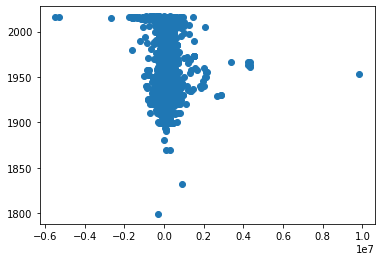

In [35]:
# so the profit and year built has negative impact with each other on the sale

plt.scatter(nashville_data['Profit_amount'],nashville_data['YearBuilt'])
#plt.xlabel('Profit')
#plt.ylabel('Discount')

### Some basic visualizations

Text(0, 0.5, 'cities')

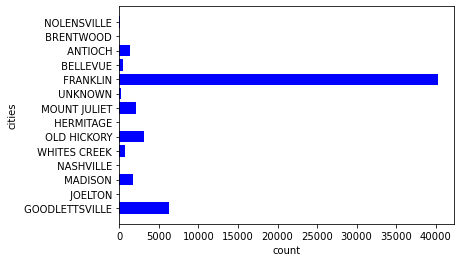

In [36]:
# count of Sale done according to the city of property

city = nashville_data['city_of_property'].unique()
sale_counts = nashville_data['city_of_property'].groupby(nashville_data['city_of_property']).count()

plt.barh(city,sale_counts, color = 'blue')
plt.xlabel('count')
plt.ylabel('cities')

Text(0, 0.5, 'avg_sale')

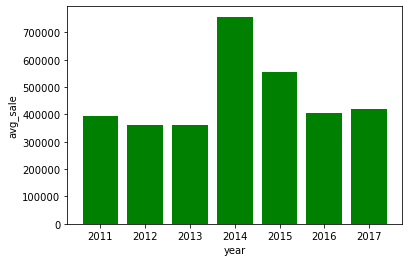

In [37]:
# year built over 2010 and their average  sale value

year_built = nashville_data['YearBuilt'].loc[nashville_data['YearBuilt']>2010].unique()

avg_sale = nashville_data['SalePrice'].loc[nashville_data['YearBuilt']>2010].groupby(nashville_data['YearBuilt']).mean().round(1)
avg_sale

plt.bar(year_built, avg_sale, color ='green')
plt.xlabel('year')
plt.ylabel('avg_sale')

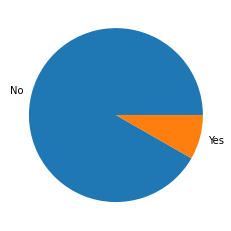

In [38]:
# pie chart on count of SolsAsVacant

Vacant = nashville_data['SoldAsVacant'].unique()

total_count = nashville_data['SoldAsVacant'].groupby( nashville_data['SoldAsVacant']).count()

plt.pie(total_count , labels = Vacant)
plt.show()

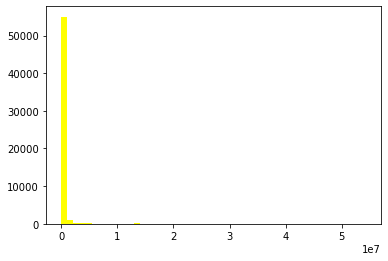

In [39]:
# histogram based on the sale value

Sale_vales = nashville_data['SalePrice'].round(1)
Sale_vales

plt.hist(Sale_vales, bins= 50, color = 'yellow')
plt.show()

[2013. 2014. 2015. 2016. 2017.]
YearBuilt
2013.0     27
2014.0     78
2015.0    177
2016.0    129
2017.0      3
Name: SoldAsVacant, dtype: int64


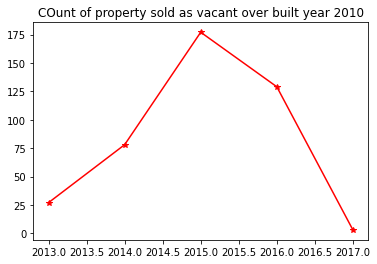

In [40]:
# sold as vacant count with built year over 2010

year_built = nashville_data['YearBuilt'].loc[(nashville_data['SoldAsVacant']== 'Yes') & (nashville_data['YearBuilt']> 2010)].sort_values(ascending = True).unique()
print(year_built)

total_count = nashville_data['SoldAsVacant'].loc[(nashville_data['SoldAsVacant']== 'Yes') & (nashville_data['YearBuilt']> 2010)].groupby( nashville_data['YearBuilt']).count()
print(total_count)

plt.plot(year_built, total_count, color='red', marker='*')
plt.title('COunt of property sold as vacant over built year 2010')
plt.show()